In [1]:
import networkx as nx
borders = nx.Graph()
not_borders1 = nx.DiGraph() # Just for our reference
not_borders2 = nx.MultiGraph() # Just for our reference

In [2]:
borders.add_node("Zimbabwe")
borders.add_nodes_from(["Lugandon", "Zambia", "Portugal", "Kuwait",
"Colombia"])
borders.remove_node("Lugandon")
borders.add_edge("Zambia", "Zimbabwe")
borders.add_edges_from([("Uganda", "Rwanda"), ("Uganda", "Kenya"),
("Uganda", "South Sudan"), ("Uganda", "Tanzania"),
("Uganda", "Democratic Republic of the Congo")])

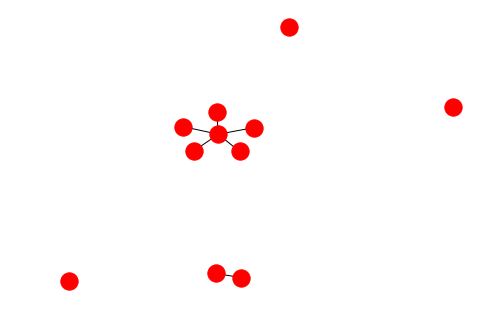

In [6]:
nx.draw(borders)

In [7]:
borders.nodes()

NodeView(('Zimbabwe', 'Zambia', 'Portugal', 'Kuwait', 'Colombia', 'Uganda', 'Rwanda', 'Kenya', 'South Sudan', 'Tanzania', 'Democratic Republic of the Congo'))

In [8]:
borders.node

NodeView(('Zimbabwe', 'Zambia', 'Portugal', 'Kuwait', 'Colombia', 'Uganda', 'Rwanda', 'Kenya', 'South Sudan', 'Tanzania', 'Democratic Republic of the Congo'))

In [12]:
borders.edges

EdgeView([('Zimbabwe', 'Zambia'), ('Uganda', 'Rwanda'), ('Uganda', 'Kenya'), ('Uganda', 'South Sudan'), ('Uganda', 'Tanzania'), ('Uganda', 'Democratic Republic of the Congo')])

In [13]:
borders.neighbors("Zimbabwe")

In [18]:
nx.betweenness_centrality(borders) # France

{'Colombia': 0.0,
 'Democratic Republic of the Congo': 0.0,
 'Kenya': 0.0,
 'Kuwait': 0.0,
 'Portugal': 0.0,
 'Rwanda': 0.0,
 'South Sudan': 0.0,
 'Tanzania': 0.0,
 'Uganda': 0.22222222222222224,
 'Zambia': 0.0,
 'Zimbabwe': 0.0}

In [19]:
nx.closeness_centrality(borders) # France

{'Colombia': 0.0,
 'Democratic Republic of the Congo': 0.2777777777777778,
 'Kenya': 0.2777777777777778,
 'Kuwait': 0.0,
 'Portugal': 0.0,
 'Rwanda': 0.2777777777777778,
 'South Sudan': 0.2777777777777778,
 'Tanzania': 0.2777777777777778,
 'Uganda': 0.5,
 'Zambia': 0.1,
 'Zimbabwe': 0.1}

In [20]:
nx.degree_centrality(borders)

{'Colombia': 0.0,
 'Democratic Republic of the Congo': 0.1,
 'Kenya': 0.1,
 'Kuwait': 0.0,
 'Portugal': 0.0,
 'Rwanda': 0.1,
 'South Sudan': 0.1,
 'Tanzania': 0.1,
 'Uganda': 0.5,
 'Zambia': 0.1,
 'Zimbabwe': 0.1}

In [21]:
import community
partition = community.best_partition(borders)

In [22]:
partition

{'Colombia': 3,
 'Democratic Republic of the Congo': 4,
 'Kenya': 4,
 'Kuwait': 2,
 'Portugal': 1,
 'Rwanda': 4,
 'South Sudan': 4,
 'Tanzania': 4,
 'Uganda': 4,
 'Zambia': 0,
 'Zimbabwe': 0}

In [23]:
community.modularity(partition, borders)

0.27777777777777773

In [24]:
import networkx as nx, community
import pandas as pd

# Import the network
G = nx.read_adjlist(open("soc-Epinions1.txt", "rb"))

# Extract community structure and save it as a data series
partition = pd.Series(community.best_partition(G))

# Find the index of the 10th largest community
top10 = partition.value_counts().index[9]

# Extract the 10th largest community
# Remember that node labels are strings!
subgraph = partition[partition == top10].index.values.astype('str')
F = G.subgraph(subgraph)

# Calculate the network measures
df = pd.DataFrame()
df["degree"] = pd.Series(nx.degree_centrality(F))
df["closeness"] = pd.Series(nx.closeness_centrality(F))
df["betweenness"] = pd.Series(nx.betweenness_centrality(F))
df["eigenvector"] = pd.Series(nx.eigenvector_centrality(F))
df["clustering"] = pd.Series(nx.clustering(F))

# Calculate the correlations
print(df.corr())


               degree  closeness  betweenness  eigenvector  clustering
degree       1.000000   0.088531     0.791717     0.582656    0.055331
closeness    0.088531   1.000000     0.142635     0.241262   -0.118976
betweenness  0.791717   0.142635     1.000000     0.275262   -0.020874
eigenvector  0.582656   0.241262     0.275262     1.000000   -0.021761
clustering   0.055331  -0.118976    -0.020874    -0.021761    1.000000


In [ ]:
nx.draw(G)